In [24]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
import pandas as pd
import numpy as np

# Load datasets
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
digits = load_digits()

# Convert to DataFrames for easy inspection
datasets = {
    "Iris": (iris, pd.DataFrame(iris.data, columns=iris.feature_names)),
    "Wine": (wine, pd.DataFrame(wine.data, columns=wine.feature_names)),
    "Breast Cancer": (cancer, pd.DataFrame(cancer.data, columns=cancer.feature_names)),
    "Digits": (digits, pd.DataFrame(digits.data))  # No column names in digits
}

# Inspect dataset shapes and value ranges
for name, (ds, df) in datasets.items():
    print(f"\n📊 Dataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Target classes: {np.unique(ds.target)}")
    print(f"Feature Range (min to max):\n{df.describe().loc[['min', 'max']]}")



📊 Dataset: Iris
Shape: (150, 4)
Target classes: [0 1 2]
Feature Range (min to max):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                4.3               2.0                1.0               0.1
max                7.9               4.4                6.9               2.5

📊 Dataset: Wine
Shape: (178, 13)
Target classes: [0 1 2]
Feature Range (min to max):
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
min    11.03        0.74  1.36               10.6       70.0           0.98   
max    14.83        5.80  3.23               30.0      162.0           3.88   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
min        0.34                  0.13             0.41             1.28  0.48   
max        5.08                  0.66             3.58            13.00  1.71   

     od280/od315_of_diluted_wines  proline  
min                          1.27    278.0  
max                    

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store baseline results
baseline_results = []

# Loop through datasets
for name, (ds, df) in datasets.items():
    X, y = df.values, ds.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\n📂 Dataset: {name}")
    for model_name, model in models.items():
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        baseline_results.append({
            "Dataset": name,
            "Model": model_name,
            "Accuracy": acc
        })
        print(f"{model_name}: {acc:.4f}")



📂 Dataset: Iris
Logistic Regression: 1.0000
k-NN: 1.0000
SVM: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000

📂 Dataset: Wine
Logistic Regression: 0.9722
k-NN: 0.7222
SVM: 0.8056
Decision Tree: 0.9444
Random Forest: 1.0000

📂 Dataset: Breast Cancer


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression: 0.9561
k-NN: 0.9561
SVM: 0.9474
Decision Tree: 0.9474
Random Forest: 0.9649

📂 Dataset: Digits
Logistic Regression: 0.9750
k-NN: 0.9861
SVM: 0.9861
Decision Tree: 0.8611
Random Forest: 0.9833


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

# Define transformations
transformers = {
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Store transformed results
transformed_results = []

# Apply each transformation
for trans_name, transformer in transformers.items():
    print(f"\n🔧 Applying: {trans_name}")
    
    for ds_name, (ds, df) in datasets.items():
        X, y = df.values, ds.target

        # Try-catch for log-transform on 0 or negative values
        try:
            X_trans = transformer.fit_transform(X)
        except Exception as e:
            print(f"⚠️ Skipping {trans_name} on {ds_name}: {e}")
            continue

        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        for model_name, model in models.items():
            clf = model
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            transformed_results.append({
                "Dataset": ds_name,
                "Transformation": trans_name,
                "Model": model_name,
                "Accuracy": acc
            })
            print(f"{ds_name} | {model_name} | {trans_name}: {acc:.4f}")



🔧 Applying: Standardization
Iris | Logistic Regression | Standardization: 1.0000
Iris | k-NN | Standardization: 1.0000
Iris | SVM | Standardization: 1.0000
Iris | Decision Tree | Standardization: 1.0000
Iris | Random Forest | Standardization: 1.0000
Wine | Logistic Regression | Standardization: 1.0000
Wine | k-NN | Standardization: 0.9444
Wine | SVM | Standardization: 1.0000
Wine | Decision Tree | Standardization: 0.9444
Wine | Random Forest | Standardization: 1.0000
Breast Cancer | Logistic Regression | Standardization: 0.9737
Breast Cancer | k-NN | Standardization: 0.9474
Breast Cancer | SVM | Standardization: 0.9737
Breast Cancer | Decision Tree | Standardization: 0.9474
Breast Cancer | Random Forest | Standardization: 0.9649
Digits | Logistic Regression | Standardization: 0.9722
Digits | k-NN | Standardization: 0.9750
Digits | SVM | Standardization: 0.9806
Digits | Decision Tree | Standardization: 0.8639
Digits | Random Forest | Standardization: 0.9778

🔧 Applying: Normalization
I

/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_15802/2990594599.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=all_results, x="Model", y="Accuracy", hue="Transformation", ci=None)


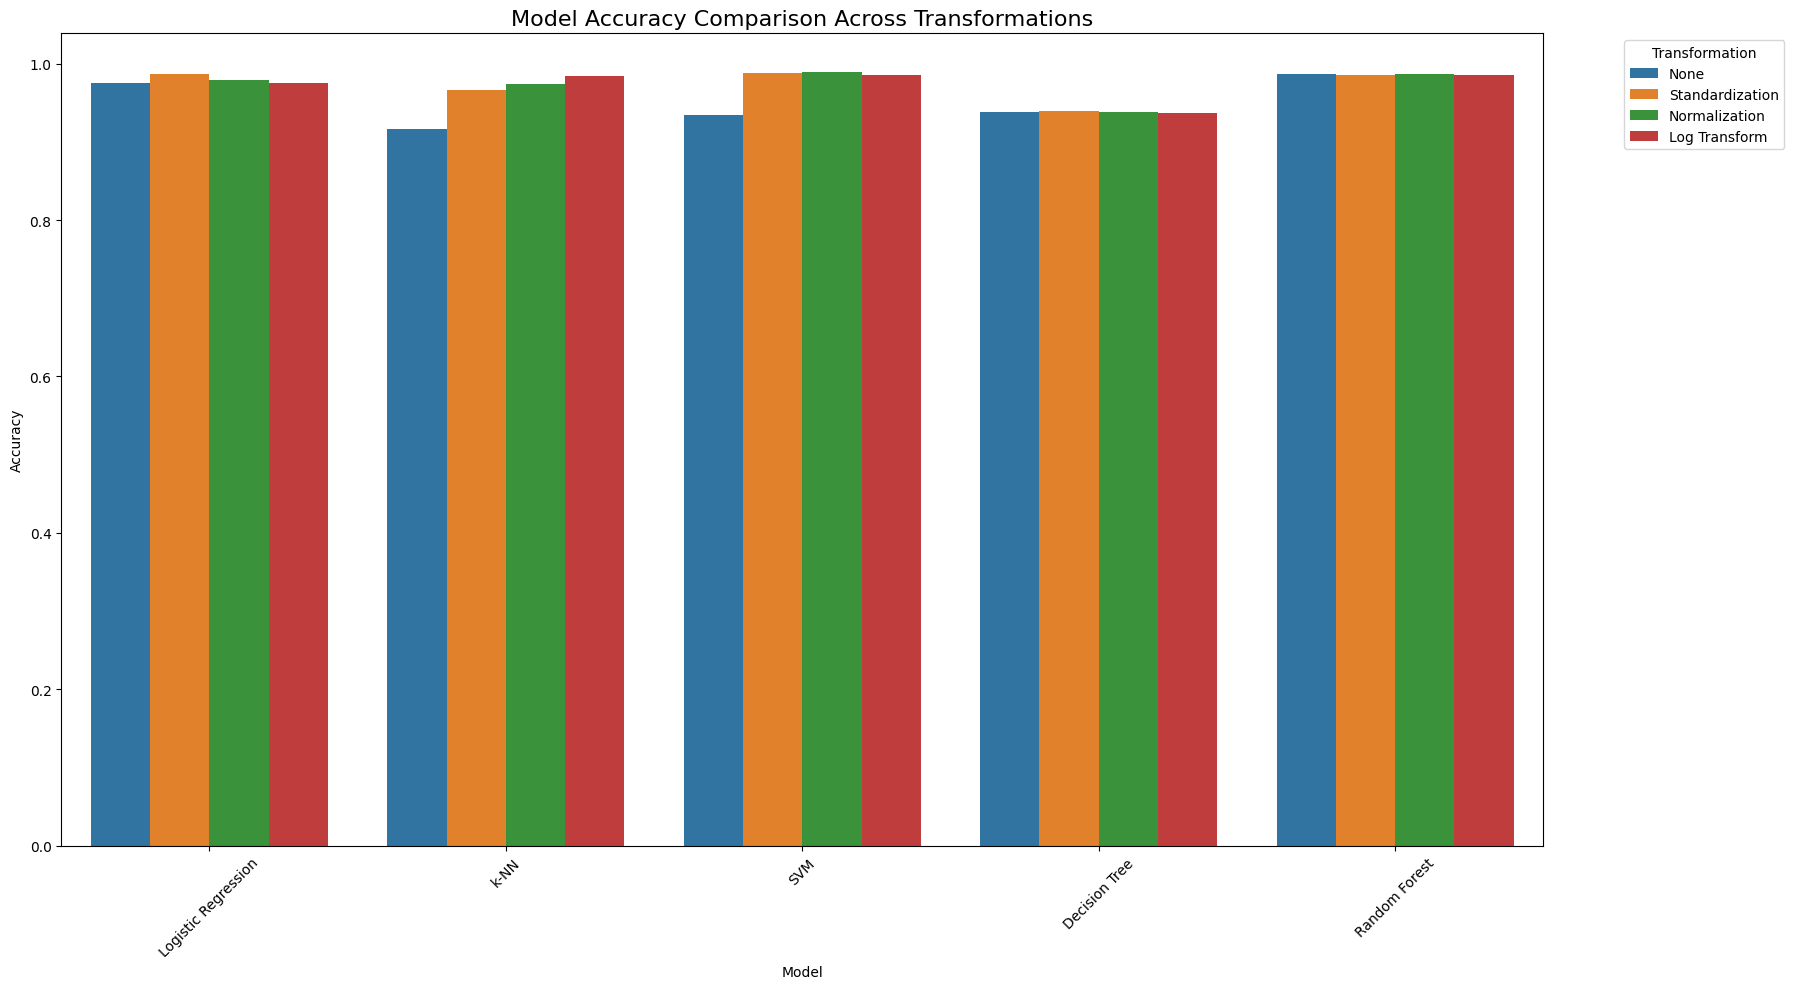

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrames
baseline_df = pd.DataFrame(baseline_results)
baseline_df["Transformation"] = "None"  # For consistency

transformed_df = pd.DataFrame(transformed_results)

# Combine all results
all_results = pd.concat([baseline_df, transformed_df], ignore_index=True)

# 🧽 Optional: Round accuracy for cleaner display
all_results["Accuracy"] = all_results["Accuracy"].round(4)

# Plot setup
plt.figure(figsize=(18, 10))
sns.barplot(data=all_results, x="Model", y="Accuracy", hue="Transformation", ci=None)
plt.title("Model Accuracy Comparison Across Transformations", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.legend(title="Transformation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


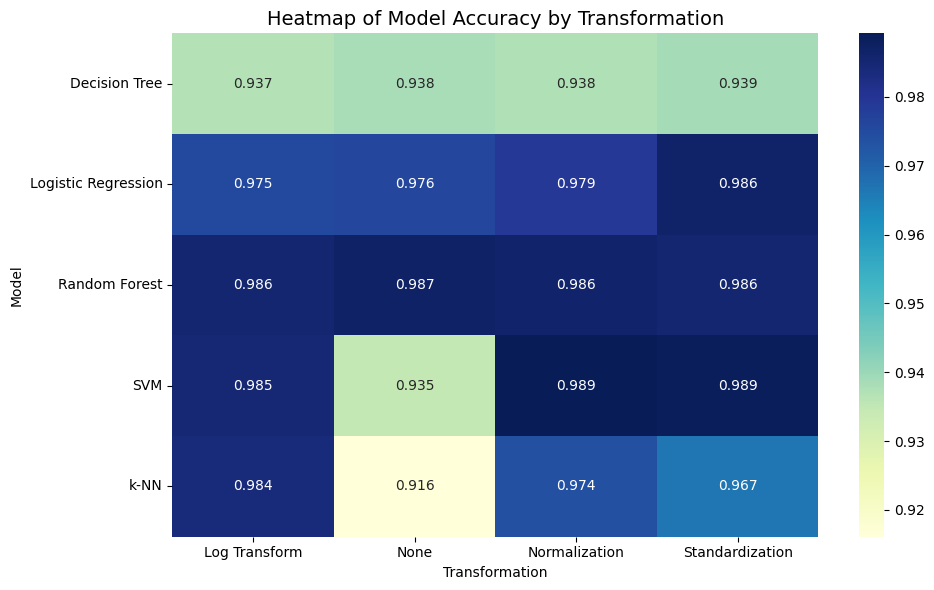

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to get Models as rows, Transformations as columns
heatmap_data = all_results.pivot_table(
    values="Accuracy", 
    index="Model", 
    columns="Transformation", 
    aggfunc="mean"
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Heatmap of Model Accuracy by Transformation", fontsize=14)
plt.ylabel("Model")
plt.xlabel("Transformation")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


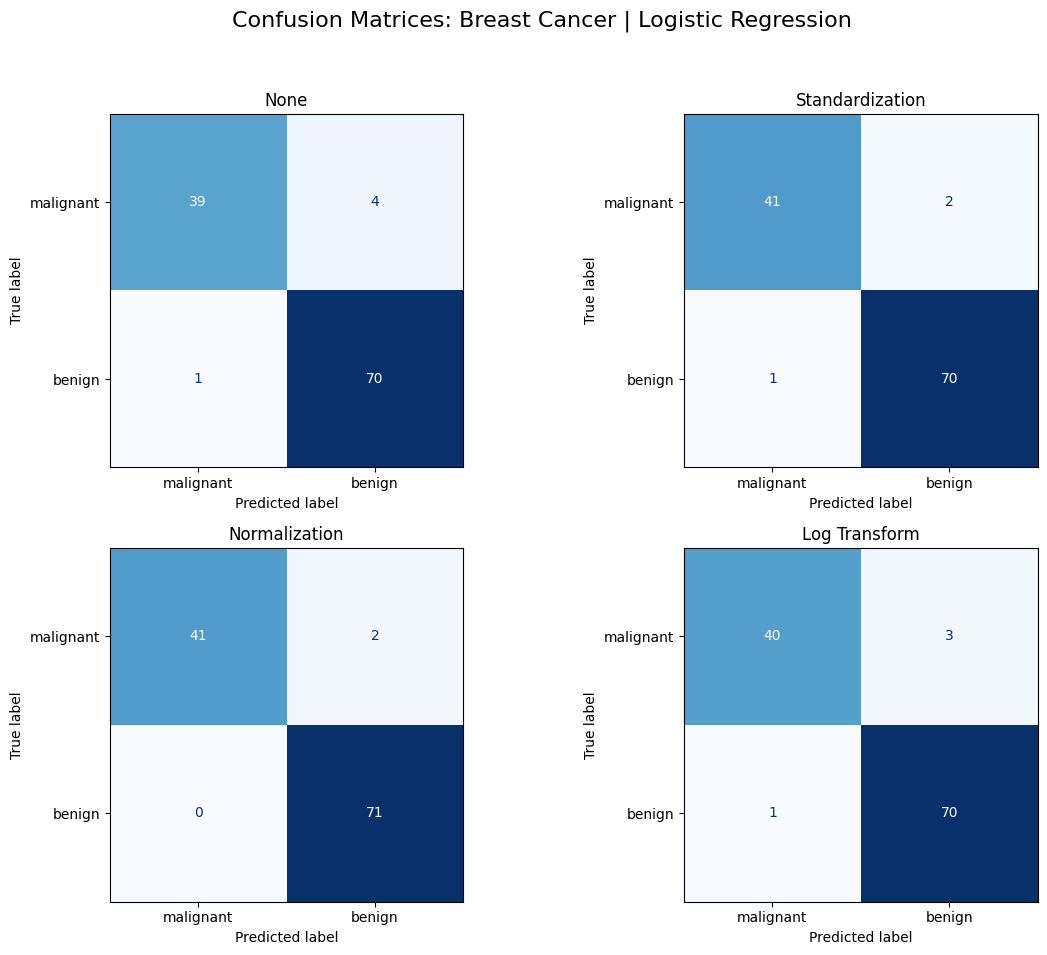

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Setup
selected_model = LogisticRegression(max_iter=1000)
selected_dataset = "Breast Cancer"
transformers_grid = {
    "None": lambda X: X,
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Get data
ds, df = datasets[selected_dataset]
X, y = df.values, ds.target

# Subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (name, transformer) in enumerate(transformers_grid.items()):
    try:
        X_trans = transformer.fit_transform(X) if name != "None" else X
        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        clf = selected_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds.target_names)
        disp.plot(ax=axs[i], cmap='Blues', colorbar=False)
        axs[i].set_title(f"{name}")
    except Exception as e:
        axs[i].set_visible(False)
        print(f"⚠️ Skipped {name}: {e}")

plt.suptitle(f"Confusion Matrices: {selected_dataset} | Logistic Regression", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


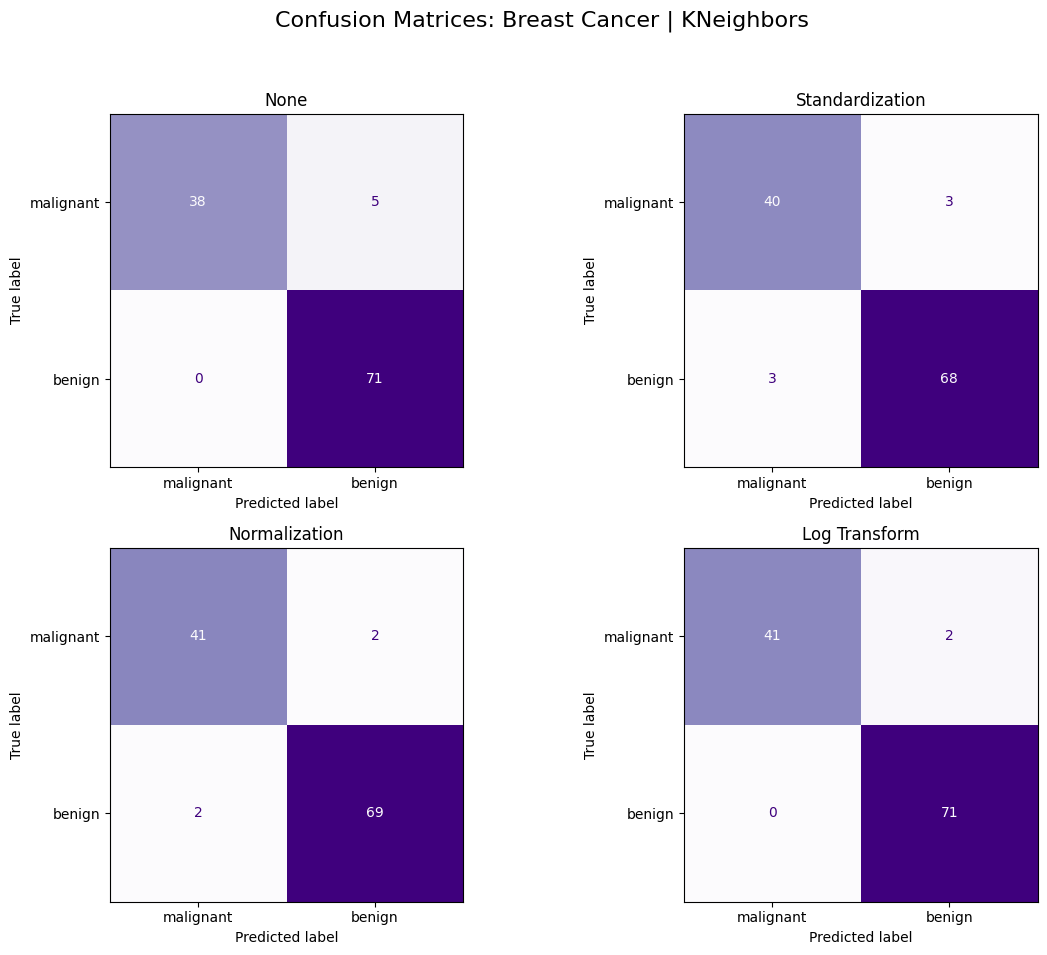

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Choose the model you want to visualize
# Examples:
# from sklearn.neighbors import KNeighborsClassifier
# selected_model = KNeighborsClassifier()
# from sklearn.svm import SVC
# selected_model = SVC()
# from sklearn.tree import DecisionTreeClassifier
# selected_model = DecisionTreeClassifier()
# from sklearn.ensemble import RandomForestClassifier
# selected_model = RandomForestClassifier()

# UPDATE this line each time you want to test another model
selected_model = KNeighborsClassifier()

# Dataset setup
selected_dataset = "Breast Cancer"
transformers_grid = {
    "None": lambda X: X,
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Get the data
ds, df = datasets[selected_dataset]
X, y = df.values, ds.target

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (name, transformer) in enumerate(transformers_grid.items()):
    try:
        X_trans = transformer.fit_transform(X) if name != "None" else X
        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        clf = selected_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds.target_names)
        disp.plot(ax=axs[i], cmap='Purples', colorbar=False)
        axs[i].set_title(f"{name}")
    except Exception as e:
        axs[i].set_visible(False)
        print(f"⚠️ Skipping {name}: {e}")

model_name = selected_model.__class__.__name__.replace("Classifier", "")
plt.suptitle(f"Confusion Matrices: {selected_dataset} | {model_name}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


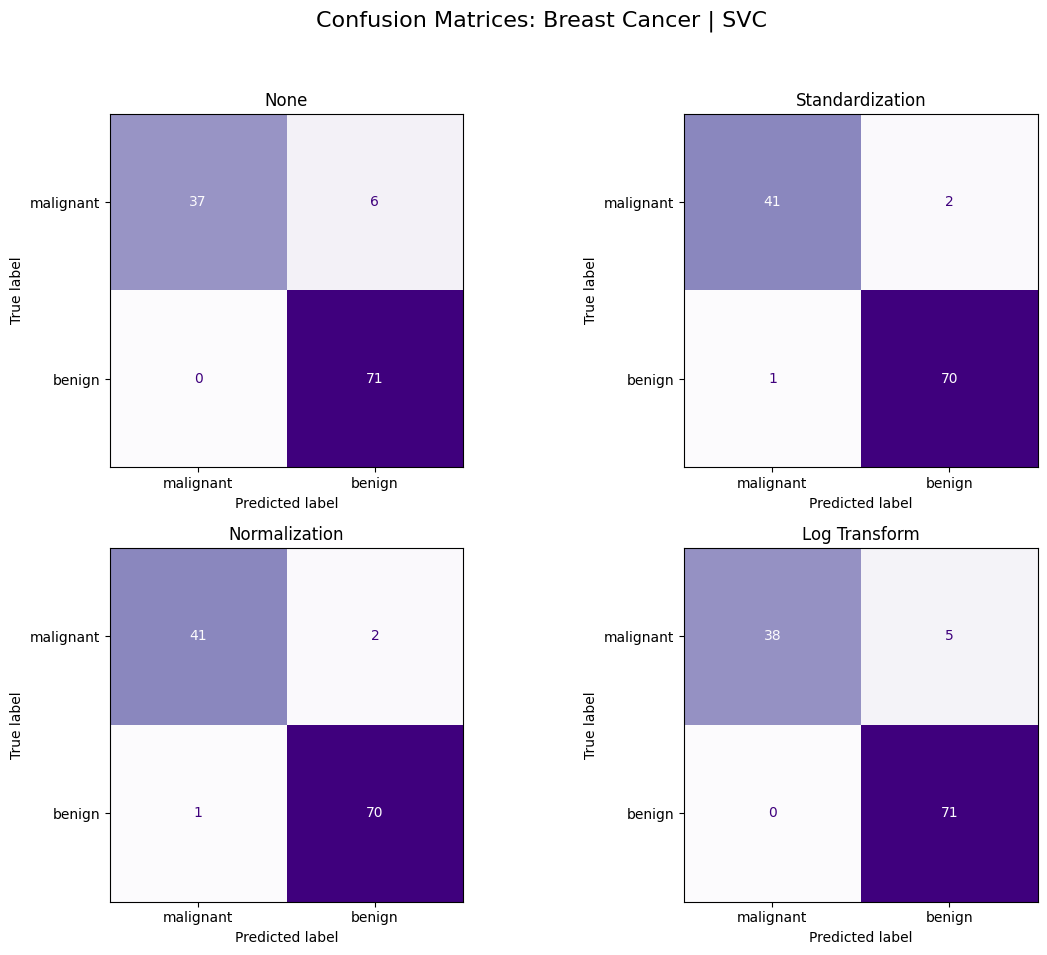

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Choose the model you want to visualize
# Examples:
# from sklearn.neighbors import KNeighborsClassifier
# selected_model = KNeighborsClassifier()
# from sklearn.svm import SVC
# selected_model = SVC()
# from sklearn.tree import DecisionTreeClassifier
# selected_model = DecisionTreeClassifier()
# from sklearn.ensemble import RandomForestClassifier
# selected_model = RandomForestClassifier()

# UPDATE this line each time you want to test another model
selected_model = SVC()

# Dataset setup
selected_dataset = "Breast Cancer"
transformers_grid = {
    "None": lambda X: X,
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Get the data
ds, df = datasets[selected_dataset]
X, y = df.values, ds.target

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (name, transformer) in enumerate(transformers_grid.items()):
    try:
        X_trans = transformer.fit_transform(X) if name != "None" else X
        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        clf = selected_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds.target_names)
        disp.plot(ax=axs[i], cmap='Purples', colorbar=False)
        axs[i].set_title(f"{name}")
    except Exception as e:
        axs[i].set_visible(False)
        print(f"⚠️ Skipping {name}: {e}")

model_name = selected_model.__class__.__name__.replace("Classifier", "")
plt.suptitle(f"Confusion Matrices: {selected_dataset} | {model_name}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


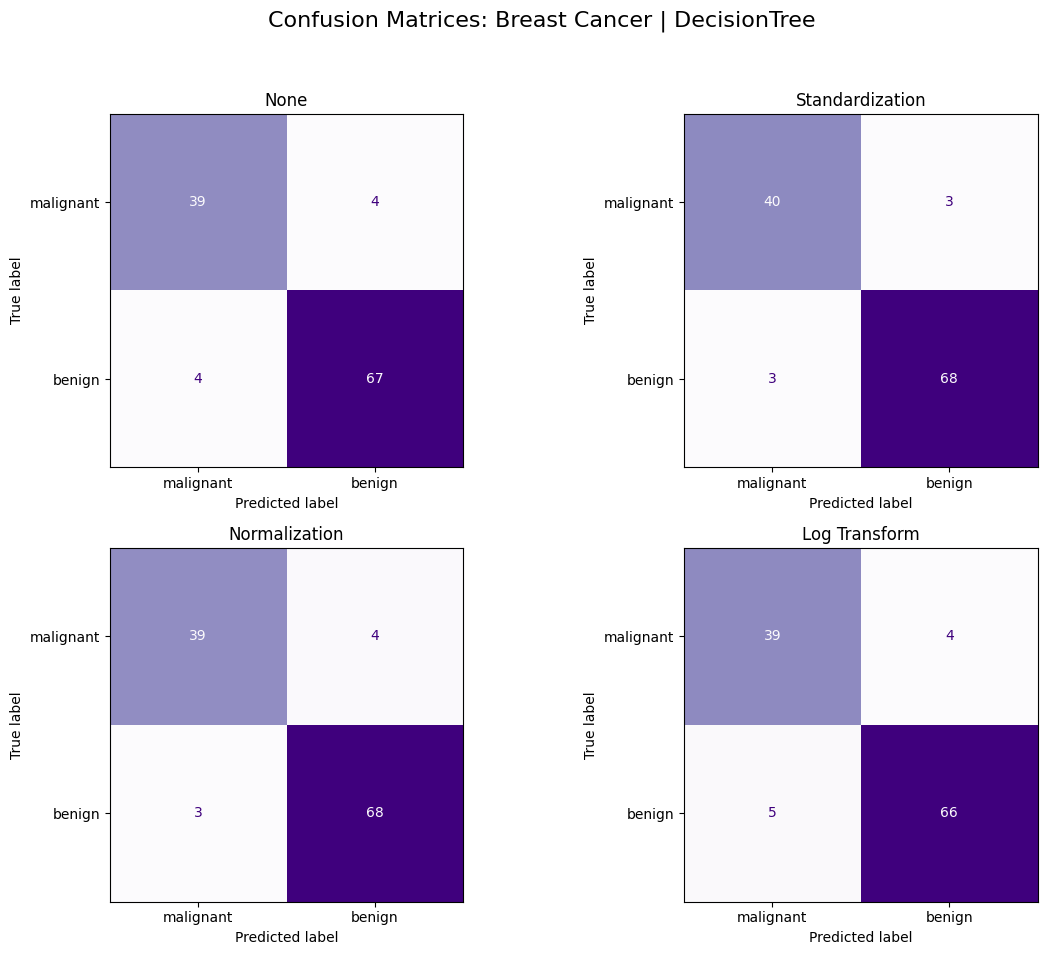

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Choose the model you want to visualize
# Examples:
# from sklearn.neighbors import KNeighborsClassifier
# selected_model = KNeighborsClassifier()
# from sklearn.svm import SVC
# selected_model = SVC()
# from sklearn.tree import DecisionTreeClassifier
# selected_model = DecisionTreeClassifier()
# from sklearn.ensemble import RandomForestClassifier
# selected_model = RandomForestClassifier()

# UPDATE this line each time you want to test another model
selected_model = DecisionTreeClassifier()

# Dataset setup
selected_dataset = "Breast Cancer"
transformers_grid = {
    "None": lambda X: X,
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Get the data
ds, df = datasets[selected_dataset]
X, y = df.values, ds.target

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (name, transformer) in enumerate(transformers_grid.items()):
    try:
        X_trans = transformer.fit_transform(X) if name != "None" else X
        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        clf = selected_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds.target_names)
        disp.plot(ax=axs[i], cmap='Purples', colorbar=False)
        axs[i].set_title(f"{name}")
    except Exception as e:
        axs[i].set_visible(False)
        print(f"⚠️ Skipping {name}: {e}")

model_name = selected_model.__class__.__name__.replace("Classifier", "")
plt.suptitle(f"Confusion Matrices: {selected_dataset} | {model_name}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


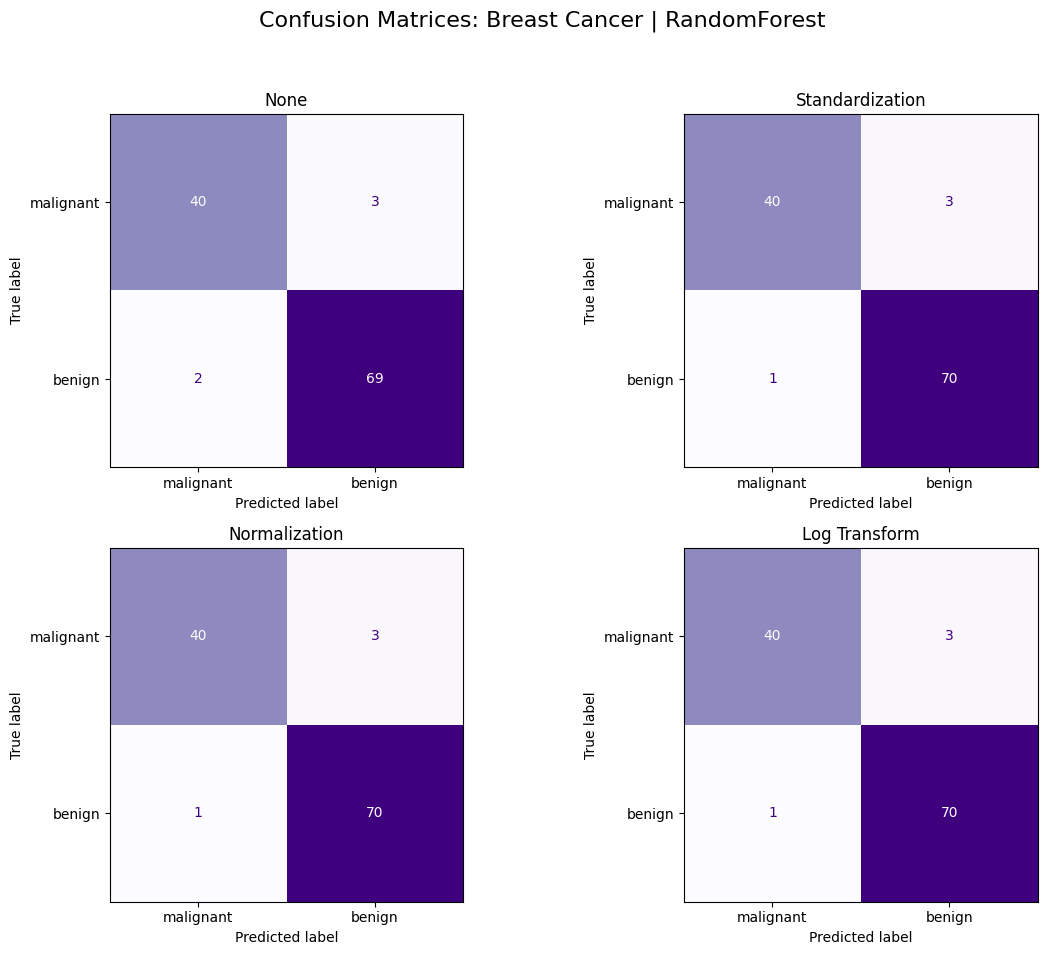

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Choose the model you want to visualize
# Examples:
# from sklearn.neighbors import KNeighborsClassifier
# selected_model = KNeighborsClassifier()
# from sklearn.svm import SVC
# selected_model = SVC()
# from sklearn.tree import DecisionTreeClassifier
# selected_model = DecisionTreeClassifier()
# from sklearn.ensemble import RandomForestClassifier
# selected_model = RandomForestClassifier()

# UPDATE this line each time you want to test another model
selected_model = RandomForestClassifier()

# Dataset setup
selected_dataset = "Breast Cancer"
transformers_grid = {
    "None": lambda X: X,
    "Standardization": StandardScaler(),
    "Normalization": MinMaxScaler(),
    "Log Transform": FunctionTransformer(np.log1p, validate=True)
}

# Get the data
ds, df = datasets[selected_dataset]
X, y = df.values, ds.target

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (name, transformer) in enumerate(transformers_grid.items()):
    try:
        X_trans = transformer.fit_transform(X) if name != "None" else X
        X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

        clf = selected_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds.target_names)
        disp.plot(ax=axs[i], cmap='Purples', colorbar=False)
        axs[i].set_title(f"{name}")
    except Exception as e:
        axs[i].set_visible(False)
        print(f"⚠️ Skipping {name}: {e}")

model_name = selected_model.__class__.__name__.replace("Classifier", "")
plt.suptitle(f"Confusion Matrices: {selected_dataset} | {model_name}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
